In [34]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
train = ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/parid/Desktop/DIML/forest_fire/Training and Validation",
                                         target_size=(150,150),
                                         batch_size= 32,
                                         class_mode = 'binary')
test_dataset = test.flow_from_directory("C:/Users/parid/Desktop/DIML/forest_fire/Testing",
                                         target_size=(150,150),
                                         batch_size= 32,
                                         class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [8]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [13]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu' ,input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.9575 - loss: 0.1443 - val_accuracy: 0.8971 - val_loss: 0.2696
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.9531 - loss: 0.1448 - val_accuracy: 0.9265 - val_loss: 0.2628
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 355ms/step - accuracy: 0.9546 - loss: 0.1295 - val_accuracy: 0.8676 - val_loss: 0.4959
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9608 - loss: 0.1256 - val_accuracy: 0.9265 - val_loss: 0.1585
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - accuracy: 0.9486 - loss: 0.1481 - val_accuracy: 0.9412 - val_loss: 0.1541


In [22]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [17]:
predictions

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [23]:
print(len(predictions))

68


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

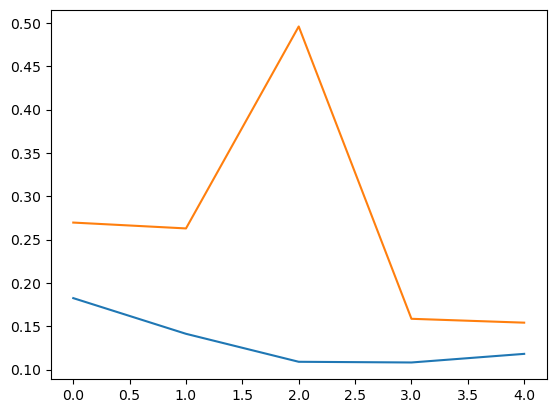

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend

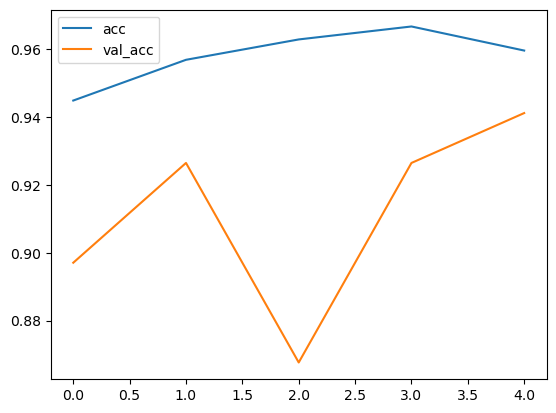

In [25]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [32]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predictImage(filename):
    # Correct the function name to load_img
    img1 = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img1)
    y = image.img_to_array(img1)
    # You may need to add additional processing for y depending on your model

    x = np.expand_dims(y,axis=0)
    val = model.predict(x)
    print(val)
    if val == 1:
      plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[[0.]]


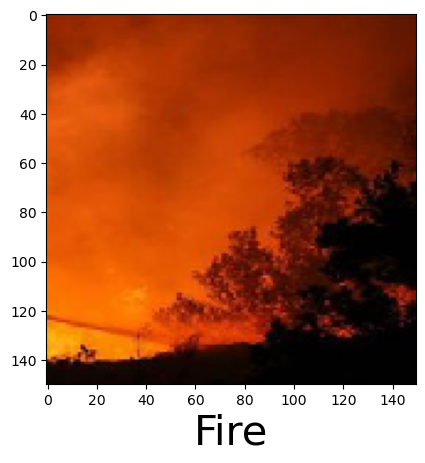

In [33]:
predictImage(r"C:\Users\parid\Desktop\DIML\forest_fire\Training and Validation\fire\abc018.jpg")  